In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
house_race_2020 = pd.read_csv('../data/house_rep_data_final.csv')

### Part 2: Exploratory Data Analysis
Using your scraped data, investigates different relationships between candidates and the amount of money they raised. Here are some suggestions to get you started, but feel free to pose you own questions or do additional exploration:  

In [3]:
house_race_2020

,Candidate,Party,Vote Percentage,State,District,Incumbent,Winner,Money Raised,Money Spent
0,Doug Jones,D,39.6,Alabama,2020,True,False,"30,640,635","32,297,767"
1,Tommy Tuberville,R,60.2,Alabama,2020,False,True,"8,537,218","8,363,739"
2,Michael Parrish,I,0.0,Alabama,2020,False,False,"5,116","2,639"
3,Jerry Carl,R,64.9,Alabama,1,False,True,"1,971,321","1,859,349"
4,James Averhart,D,35.0,Alabama,1,False,False,"80,095","78,973"
...,...,...,...,...,...,...,...,...,...
1013,Amanda Stuck,D,36.0,Wisconsin,08,False,False,"416,978","399,916"
1014,Cynthia Lummis,R,72.8,Wyoming,2020,False,True,"2,547,033","2,581,058"
1015,Merav Ben,D,26.8,Wyoming,2020,False,False,"542,570","528,292"
1016,Liz Cheney,R,68.6,Wyoming,01,True,True,"3,003,883","3,060,167"


In [70]:
house_race_2020 = house_race_2020.loc[house_race_2020['District']!="2020"]
#drop "Senate" from district column
house_race_2020

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
3,Jerry Carl,R,64.9,Alabama,01,False,True,1971321,1859349
4,James Averhart,D,35.0,Alabama,01,False,False,80095,78973
5,Barry Moore,R,65.3,Alabama,02,False,True,650807,669368
6,Phyllis Harvey-Hall,D,34.6,Alabama,02,False,False,56050,55988
7,Mike D,R,67.5,Alabama,03,True,True,1193111,1218564
...,...,...,...,...,...,...,...,...,...
1011,Tricia Zunker,D,39.2,Wisconsin,07,False,False,1261957,1232690
1012,Mike Gallagher,R,64.0,Wisconsin,08,True,True,3202905,2841801
1013,Amanda Stuck,D,36.0,Wisconsin,08,False,False,416978,399916
1016,Liz Cheney,R,68.6,Wyoming,01,True,True,3003883,3060167


In [5]:
house_race_2020['District'] = house_race_2020['District'].str.zfill(2)
house_race_2020.head()

C:\Users\briga\AppData\Local\Temp\ipykernel_14496\186559947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_race_2020['District'] = house_race_2020['District'].str.zfill(2)


,Candidate,Party,Vote Percentage,State,District,Incumbent,Winner,Money Raised,Money Spent
3,Jerry Carl,R,64.9,Alabama,01,False,True,"1,971,321","1,859,349"
4,James Averhart,D,35.0,Alabama,01,False,False,"80,095","78,973"
5,Barry Moore,R,65.3,Alabama,02,False,True,"650,807","669,368"
6,Phyllis Harvey-Hall,D,34.6,Alabama,02,False,False,"56,050","55,988"
7,Mike D,R,67.5,Alabama,03,True,True,"1,193,111","1,218,564"


In [6]:
house_race_2020=house_race_2020.rename(columns={'Vote Percentage':'Vote','Money Raised':'Raised', 'Money Spent':'Spent'})
house_race_2020.head()

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
3,Jerry Carl,R,64.9,Alabama,01,False,True,"1,971,321","1,859,349"
4,James Averhart,D,35.0,Alabama,01,False,False,"80,095","78,973"
5,Barry Moore,R,65.3,Alabama,02,False,True,"650,807","669,368"
6,Phyllis Harvey-Hall,D,34.6,Alabama,02,False,False,"56,050","55,988"
7,Mike D,R,67.5,Alabama,03,True,True,"1,193,111","1,218,564"


In [7]:
house_race_2020['Raised'] = house_race_2020['Raised'].str.replace('\$|,','').apply(int)

C:\Users\briga\AppData\Local\Temp\ipykernel_14496\1150013449.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  house_race_2020['Raised'] = house_race_2020['Raised'].str.replace('\$|,','').apply(int)


In [8]:
house_race_2020['Spent']= house_race_2020['Spent'].str.replace('\$|,','').apply(int)

C:\Users\briga\AppData\Local\Temp\ipykernel_14496\4283798421.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  house_race_2020['Spent']= house_race_2020['Spent'].str.replace('\$|,','').apply(int)


In [33]:
print(house_race_2020.info())
house_race_2020.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 3 to 1017
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Candidate  924 non-null    object 
 1   Party      924 non-null    object 
 2   Vote       924 non-null    float64
 3   State      924 non-null    object 
 4   District   924 non-null    object 
 5   Incumbent  924 non-null    bool   
 6   Winner     924 non-null    bool   
 7   Raised     924 non-null    int64  
 8   Spent      924 non-null    int64  
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 59.6+ KB
None


,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
3,Jerry Carl,R,64.9,Alabama,01,False,True,1971321,1859349
4,James Averhart,D,35.0,Alabama,01,False,False,80095,78973
5,Barry Moore,R,65.3,Alabama,02,False,True,650807,669368
6,Phyllis Harvey-Hall,D,34.6,Alabama,02,False,False,56050,55988
7,Mike D,R,67.5,Alabama,03,True,True,1193111,1218564
8,Adia Winfrey,D,32.4,Alabama,03,False,False,50273,40971
9,Robert B,R,82.5,Alabama,04,True,True,1255076,1323812
10,Mo Brooks,R,95.8,Alabama,05,True,True,655365,210045
11,Gary Palmer,R,97.1,Alabama,06,True,True,907219,909082
12,Terri Sewell,D,97.2,Alabama,07,True,True,2168165,1495957


In [50]:
house_race_2020.loc[house_race_2020['Vote']<=20]

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
31,Tom Lewellen,I,0.0,Arizona,06,False,False,11685,11000
72,Nikka Piterman,R,9.6,California,13,False,False,9839,9904
93,Mike Garcia,R,0.0,California,25,False,True,9962507,9584648
94,Christy Smith,D,0.0,California,25,False,False,5977734,5808477
95,George Papadopoulos,R,0.0,California,25,False,False,132106,132106
...,...,...,...,...,...,...,...,...,...
967,Stevan Porter,L,0.0,Virginia,11,False,False,533,1316
981,Craig Keller,R,16.7,Washington,07,False,False,2904,3703
996,Belinda Fox-Spencer,I,0.0,West,District,False,False,5207,5207
1008,Tom Tiffany,R,0.0,Wisconsin,07,False,True,2637459,2514740


#Q: What is the average amount raised/spent by winning candidates?

In [43]:
winners = house_race_2020.loc[house_race_2020['Winner']==True]
winners.head()

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
3,Jerry Carl,R,64.9,Alabama,01,False,True,1971321,1859349
5,Barry Moore,R,65.3,Alabama,02,False,True,650807,669368
7,Mike D,R,67.5,Alabama,03,True,True,1193111,1218564
9,Robert B,R,82.5,Alabama,04,True,True,1255076,1323812
10,Mo Brooks,R,95.8,Alabama,05,True,True,655365,210045


In [55]:
winners.loc[house_race_2020['Vote']<=45]

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
93,Mike Garcia,R,0.0,California,25,False,True,9962507,9584648
314,Jesus Garcia,D,16.0,Illinois,04,True,True,822846,711159
372,Randy Feenstra,R,37.9,Iowa,04,False,True,1906234,1894288
443,Kweisi Mfume,D,0.0,Maryland,07,False,True,1014126,713389
657,Chris Jacobs,R,0.0,New,District,False,True,2147101,2084271
670,Greg Murphy,R,0.0,North,District,False,True,1767790,1505559
684,Dan Bishop,R,0.0,North,District,False,True,4090260,4029864
779,Fred Keller,R,0.0,Pennsylvania,12,True,True,1541938,1066158
1008,Tom Tiffany,R,0.0,Wisconsin,07,False,True,2637459,2514740


In [30]:
print(winners['Raised'].mean().astype(int))
print(winners['Spent'].mean().astype(int))

3104643
2703967


In [44]:
winners.describe()

,Vote,Raised,Spent
count,444.000000,4.440000e+02,4.440000e+02
mean,63.147523,3.104643e+06,2.703968e+06
std,13.512944,6.373445e+06,5.578972e+06
min,0.000000,2.571740e+05,9.506500e+04
25%,55.775000,1.121583e+06,9.672515e+05
50%,62.550000,1.806622e+06,1.565654e+06
75%,69.625000,2.993103e+06,2.802105e+06
max,100.000000,1.089162e+08,9.688452e+07


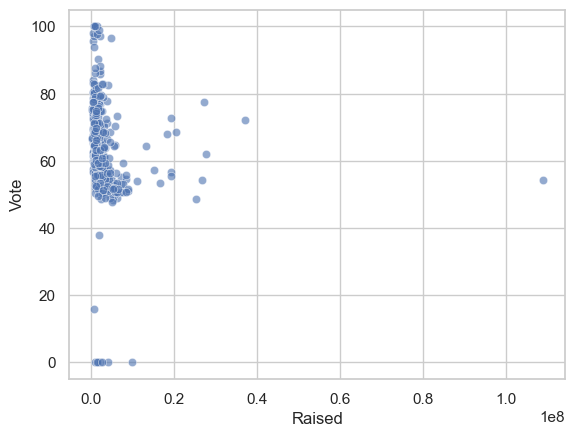

In [57]:
sns.set(style='whitegrid')

 
sns.scatterplot(x="Raised",
                    y="Vote",
                    data=winners,
                    alpha=0.6);

In [31]:
losers = house_race_2020.loc[house_race_2020['Winner']==False]
losers.head()

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
4,James Averhart,D,35.0,Alabama,01,False,False,80095,78973
6,Phyllis Harvey-Hall,D,34.6,Alabama,02,False,False,56050,55988
8,Adia Winfrey,D,32.4,Alabama,03,False,False,50273,40971
16,Alyse Galvin,I,45.3,Alaska,01,False,False,5178452,5088103
20,Tiffany Shedd,R,48.4,Arizona,01,False,False,1675618,1615704


In [67]:
losers.loc[losers['Raised']>5500000]

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
30,Hiral Tipirneni,D,47.8,Arizona,06,False,False,6301073,6366702
85,TJ Cox,D,49.6,California,21,True,False,5695157,5694005
94,Christy Smith,D,0.0,California,25,False,False,5977734,5808477
129,Joe Collins,R,28.3,California,43,False,False,10556626,9921103
136,Harley Rouda,D,48.9,California,48,True,False,5968858,6174443
141,Ammar Campa-Najjar,D,46.0,California,50,False,False,6248210,6247762
239,Debbie Mucarsel-Powell,D,48.3,Florida,26,True,False,6793521,6822740
365,Abby Finkenauer,D,48.7,Iowa,01,True,False,5901441,5875405
442,Kimberly Klacik,R,0.0,Maryland,07,False,False,8296845,7499454
445,Kimberly Klacik,R,28.1,Maryland,07,False,False,8296845,7499454


In [32]:
print(losers['Raised'].mean().astype(int))
print(losers['Spent'].mean().astype(int))

1470352
1453277


In [45]:
losers.describe()

,Vote,Raised,Spent
count,480.000000,4.800000e+02,4.800000e+02
mean,29.073125,1.470353e+06,1.453278e+06
std,17.062288,6.638308e+06,6.616235e+06
min,0.000000,4.700000e+01,0.000000e+00
25%,20.075000,2.894825e+04,2.477300e+04
50%,34.900000,1.381490e+05,1.312195e+05
75%,41.800000,1.261957e+06,1.234946e+06
max,84.000000,1.305422e+08,1.302068e+08


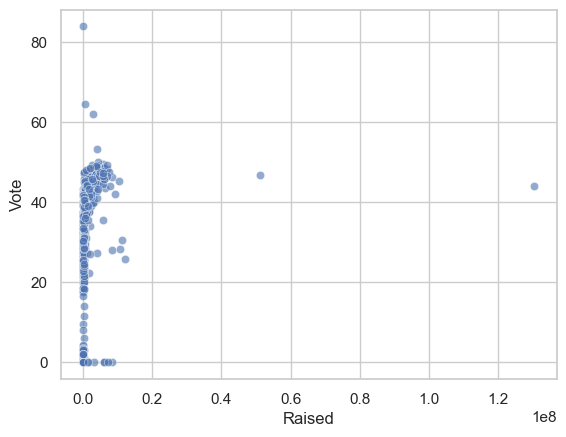

In [58]:
sns.scatterplot(x="Raised",
                    y="Vote",
                    data=losers,
                    alpha=0.6);

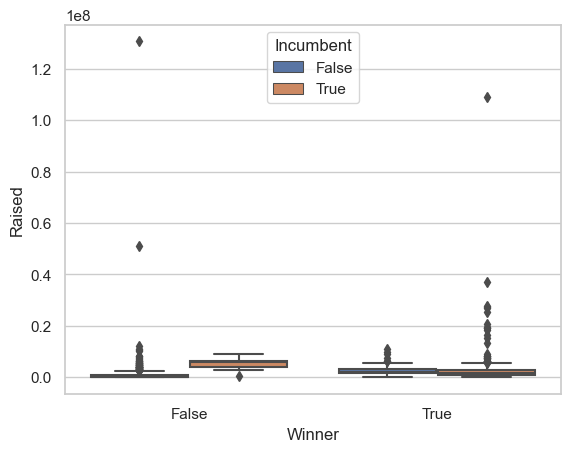

In [65]:
sns.boxplot(data=house_race_2020,
           x="Winner",
           y="Raised",
           hue="Incumbent");
            

    a. How often does the candidate who raised more money win a race?  

    b. How often does the candidate who spent more money win a race?  

    c. Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?  

    d. How often does the incumbent candidate win a race?  

    e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?